In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

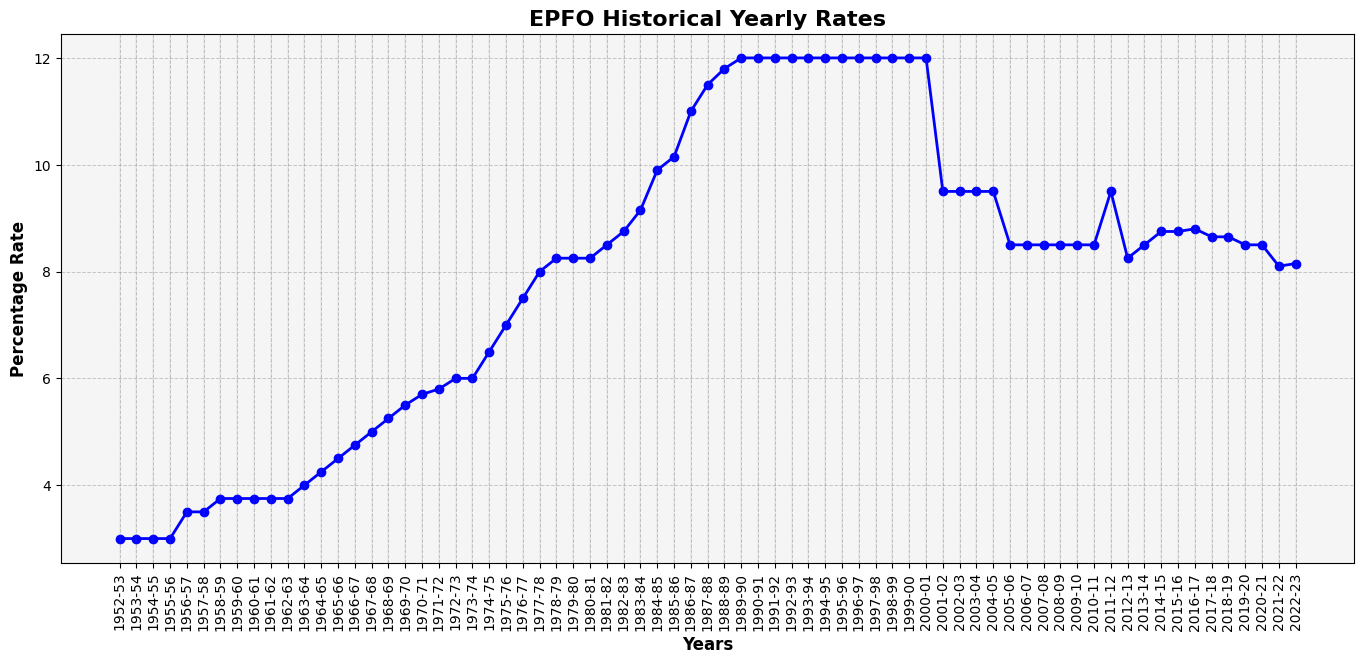

In [3]:
# Data for the years and corresponding percentages
years = [
    '1952-53', '1953-54', '1954-55', '1955-56', '1956-57', '1957-58', '1958-59', '1959-60', '1960-61', '1961-62',
    '1962-63', '1963-64', '1964-65', '1965-66', '1966-67', '1967-68', '1968-69', '1969-70', '1970-71', '1971-72',
    '1972-73', '1973-74', '1974-75', '1975-76', '1976-77', '1977-78', '1978-79', '1979-80', '1980-81', '1981-82',
    '1982-83', '1983-84', '1984-85', '1985-86', '1986-87', '1987-88', '1988-89', '1989-90', '1990-91', '1991-92',
    '1992-93', '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02',
    '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
    '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22',
    '2022-23'
]

rates = [
    3.00, 3.00, 3.00, 3.00, 3.50, 3.50, 3.75, 3.75, 3.75, 3.75,
    3.75, 4.00, 4.25, 4.50, 4.75, 5.00, 5.25, 5.50, 5.70, 5.80,
    6.00, 6.00, 6.50, 7.00, 7.50, 8.00, 8.25, 8.25, 8.25, 8.50,
    8.75, 9.15, 9.90, 10.15, 11.00, 11.50, 11.80, 12.00, 12.00, 12.00,
    12.00, 12.00, 12.00, 12.00, 12.00, 12.00, 12.00, 12.00, 12.00, 9.50,
    9.50, 9.50, 9.50, 8.50, 8.50, 8.50, 8.50, 8.50, 8.50, 9.50,
    8.25, 8.50, 8.75, 8.75, 8.80, 8.65, 8.65, 8.50, 8.50, 8.10, 8.15
]

# Create the plot with a larger figure size
plt.figure(figsize=(14, 7))

# Plotting the data with custom line style and markers
plt.plot(years, rates, marker='o', linestyle='-', color='b', markersize=6, linewidth=2)

# Adding labels and title with font size adjustments
plt.xlabel('Years', fontsize=12, fontweight='bold')
plt.ylabel('Percentage Rate', fontsize=12, fontweight='bold')
plt.title('EPFO Historical Yearly Rates', fontsize=16, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Add grid lines for better visualization, setting the grid style
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add background color for the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding vertical lines for clarity on year transitions
for year in years:
    plt.axvline(x=year, color='grey', linestyle='--', linewidth=0.3, alpha=0.5)

# Adding some extra padding and space to avoid cutoffs
plt.tight_layout(pad=2)

# Display the plot
plt.show()

C:\Users\spsk9\AppData\Local\Temp\ipykernel_24784\629929249.py:20: RuntimeWarning: divide by zero encountered in log
  log_likelihood += -0.5 * np.log(2 * np.pi * variance) - (diff**2) / (2 * variance)
C:\Users\spsk9\AppData\Local\Temp\ipykernel_24784\629929249.py:20: RuntimeWarning: invalid value encountered in scalar divide
  log_likelihood += -0.5 * np.log(2 * np.pi * variance) - (diff**2) / (2 * variance)
C:\Users\spsk9\AppData\Local\Temp\ipykernel_24784\629929249.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  log_likelihood += -0.5 * np.log(2 * np.pi * variance) - (diff**2) / (2 * variance)
C:\Users\spsk9\AppData\Local\Temp\ipykernel_24784\629929249.py:20: RuntimeWarning: invalid value encountered in scalar subtract
  log_likelihood += -0.5 * np.log(2 * np.pi * variance) - (diff**2) / (2 * variance)


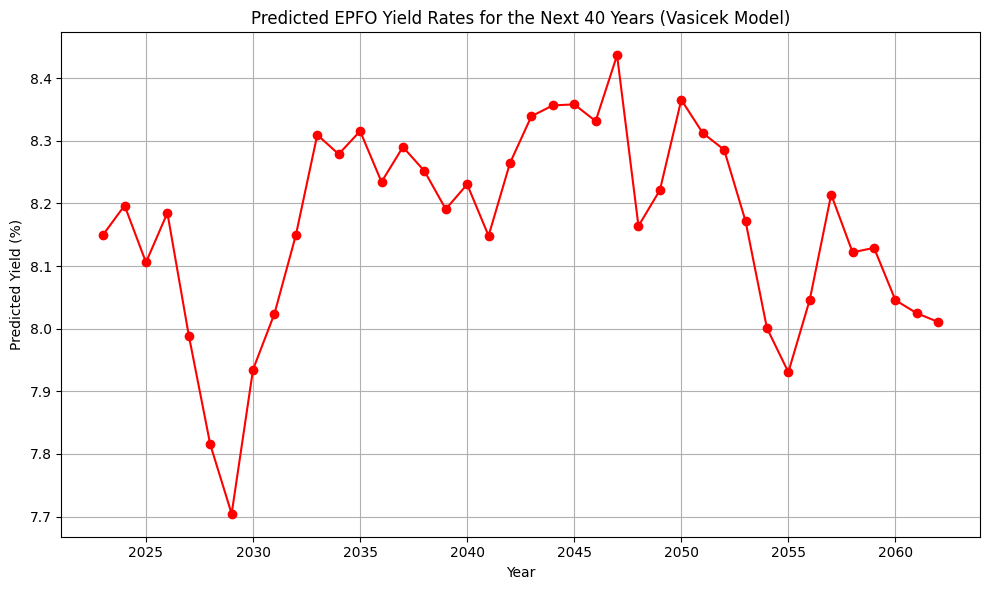

8.010672062056715

In [10]:
import numpy as np
from scipy.optimize import minimize

yields = rates
# Convert the yields data into a numpy array for processing
yields_np = np.array(yields)

# Time intervals (since data is yearly)
dt = 1  # Assuming yearly intervals

# Define the log-likelihood function for the Vasicek model
def vasicek_log_likelihood(params, rates):
    kappa, theta, sigma = params
    n = len(rates)
    log_likelihood = 0
    for i in range(1, n):
        drift = kappa * (theta - rates[i-1])
        variance = sigma**2 * dt
        diff = rates[i] - (rates[i-1] + drift * dt)
        log_likelihood += -0.5 * np.log(2 * np.pi * variance) - (diff**2) / (2 * variance)
    return -log_likelihood

# Initial parameter guess for optimization
initial_params = [0.1, np.mean(yields_np), np.std(yields_np)]

# Fit the Vasicek model parameters by minimizing the negative log-likelihood
result = minimize(vasicek_log_likelihood, initial_params, args=(yields_np,), method='L-BFGS-B', bounds=[(0, None), (None, None), (0, None)])

# Extract the estimated parameters
kappa_est, theta_est, sigma_est = result.x

# Now that we have the parameters, let's simulate future rates for 40 years using the Vasicek model.
n_years = 40
n_simulations = 1000  # We can simulate multiple paths to get an average prediction

def simulate_vasicek_path(r0, kappa, theta, sigma, n_years, dt, n_simulations):
    rates = np.zeros((n_simulations, n_years))
    rates[:, 0] = r0
    for t in range(1, n_years):
        rates[:, t] = rates[:, t-1] + kappa * (theta - rates[:, t-1]) * dt + sigma * np.sqrt(dt) * np.random.randn(n_simulations)
    return rates

# Simulate the paths
simulated_rates = simulate_vasicek_path(yields_np[-1], kappa_est, theta_est, sigma_est, n_years, dt, n_simulations)

# Calculate the mean of the simulated rates for each future year
mean_rates = simulated_rates.mean(axis=0)

# Plot the simulated mean rates for the next 40 years
future_years = np.arange(2023, 2023 + n_years)

plt.figure(figsize=(10, 6))
plt.plot(future_years, mean_rates, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Predicted Yield (%)')
plt.title('Predicted EPFO Yield Rates for the Next 40 Years (Vasicek Model)')
plt.grid(True)
plt.tight_layout()

plt.show()

# Display the final predicted rate for 40 years from now
mean_rates[-1]
